# Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 26.10.2024

__Дедлайн:__ 09.11.2024 23:59

### О задании

В этом домашнем задании вы реализуете градиентный спуск и стохастический градиентный спуск для обучения линейной регрессии, попрактикуетесь в анализе данных и их обработке, а также примените модели линейной регрессии на практике и проанализируете результаты.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 18,
$$

где points — количество баллов, которое вы набрали.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.



# Часть 1 (11.5 баллов)

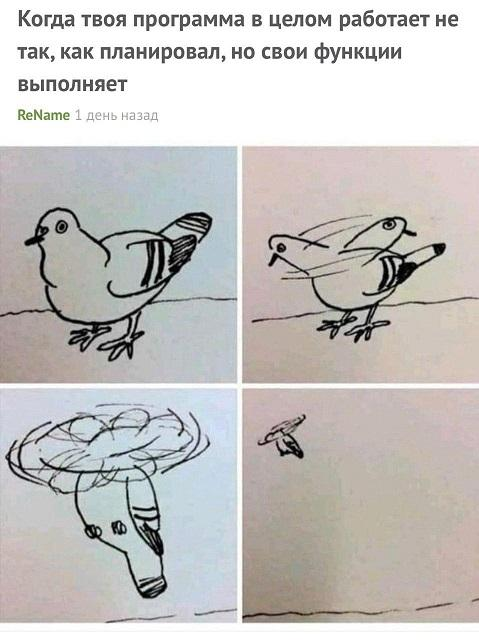

Среднеквадратичная ошибка представляется следующим образом:

$$
L\left(y, \hat{y}\right) = \left(y - \hat{y}\right)^2
$$

Значение функционала потерь в случае среднеквадратичной ошибки на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) будет равно:

$$
Q(w) = \frac{1}{\ell}\sum\limits_{i=1}^\ell L\left(y_i, \hat{y}_i\right) = \frac{1}{\ell}\sum\limits_{i=1}^\ell \left(y_i - \hat{y}_i\right)^2 = \frac{1}{\ell}\sum\limits_{i=1}^\ell \left(y_i - \langle w, x_i\rangle\right)^2 = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

## Задание 1 (0.5 балла)

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец, заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

In [ ]:
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    
    # your code here
    return X

assert X_train.shape == (354, 14)
assert len(X_train) in X_train.sum(axis=0)

assert X_test.shape == (152, 14)
assert len(X_test) in X_test.sum(axis=0)

## Задание 2 (1 балл)

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

Также вычислите значение функционала потерь на обучающей части выборки с помощью `sklearn.metrics.mean_squared_error` и проверьте, что оно совпадает с результатом реализованной вами функции.

In [ ]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    # your code here
    return loss

def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    # your code here
    return grad

In [ ]:
np.random.seed(13)
w = np.random.randn(X_train.shape[1])

result_mse_custom = # your code here
result_mse_sklearn = # your code here
result_mse_grad = # your code here

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-6.37429925e+03, -1.65709914e+04, -1.90443438e+04, -8.95951307e+01,
       -8.91581225e+02, -9.84514274e+03, -1.10614227e+05, -5.81663447e+03,
       -1.71384796e+04, -6.92153919e+05, -2.95778766e+04, -5.70787504e+05,
       -2.08850559e+04, -1.58124952e+03]))

## Задание 3 (4 балла)

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен выдавать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов.

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.
3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [ ]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=2000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)

        INPUT:
        X_train - np.array of shape (ℓ, d)
        y_train - np.array of shape (ℓ,)
        """
        
        self.w = # your code here
        self.loss_history = [mse_loss(X, y, self.w)]
        
        # your code here
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        
        # your code here
        return y_pred

Проверьте работу вашего класса. Обучите линейную регрессию на обучающей части выборки. Постройте график зависимости значения функционала потерь от итерации градиентного спуска. Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. Добейтесь того, чтобы значение MSE не превышало 100.

In [ ]:
# your code here

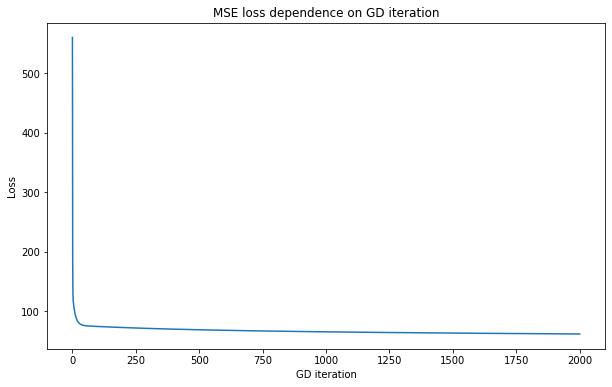

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
mse_test = # your code here
print(mse_test)
assert len(loss_history) <= 2001
assert mse_test <= 100

## Задание 4 (4 балла)

Реализуйте класс, аналогичный классу из задания 2, но с оптимизацией с помощью стохастического градиентного спуска. 

Стохастический градиентный спуск отличается от обычного тем, что на шаге градиентного спуска используется лишь один объект для подсчета градиента. Этот объект выбирается случайно без повторения - то есть один и тот же объект на одной и той же стадии обучения не может попасть в обучение дважды. Для того, чтобы реализовать это, вам будет удобно изначально перемешать объекты и выбирать их в получившейся последовательности. Если число итераций превысит число объектов, перемешайте выборку снова и повторите то же самое.

Чтобы было понятнее, о чем речь, можете посмотреть [псевдокод алгоритма](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA#%D0%98%D1%82%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4).

In [ ]:
class CustomLinearRegressionSGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=2000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)

        INPUT:
        X_train - np.array of shape (ℓ, d)
        y_train - np.array of shape (ℓ,)
        """
        
        self.w = # your code here
        self.loss_history = [mse_loss(X, y, self.w)]
        
        # your code here
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        
        # your code here
        return y_pred

Проверьте работу вашего класса, как и в прошлом задании. Подберите оптимальную длину шага (она может быть очень маленькой). Добейтесь того, чтобы значение MSE не превышало 500.

In [ ]:
# your code here

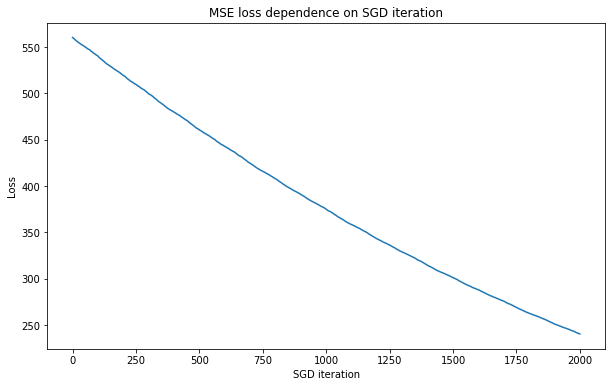

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
mse_test = # your code here
print(mse_test)
assert len(loss_history) <= 2001
assert mse_test <= 500

## Задание 5 (2 балла)

Стохастический градиентный спуск ведет себя достаточно нестабильно. Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного, либо проведите предыдущие операции с данными, добавив единичный признак уже после масштабирования.

Примените линейную регрессию со стохастическим градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 300.

Опишите наблюдения. Изменилась ли ситуация?

In [ ]:
# your code here

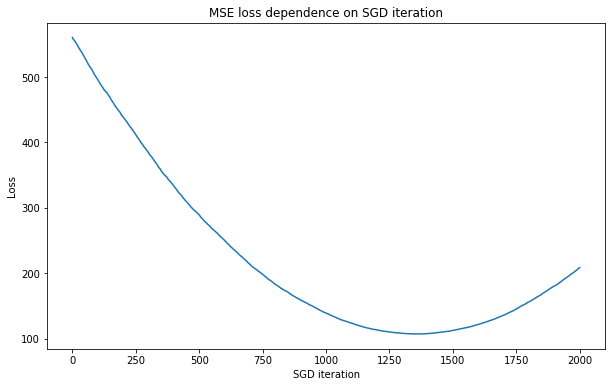

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
mse_test = # your code here
print(mse_test)
assert mse_test <= 300

# Часть 2 (7.5 баллов)

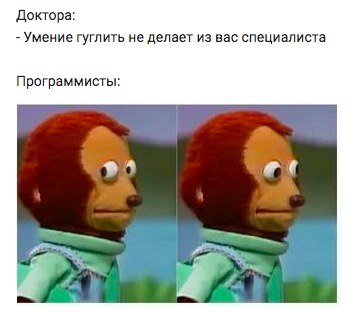

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [ ]:
data = pd.read_csv('train.csv', header=0)

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
data.drop('Id', axis=1, inplace=True)

In [ ]:
data.shape

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [ ]:
# your code here

## 2 (1 балл)

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке. Приведите описание какого-нибудь признака типа `object` из файла `description.txt` и объясните, почему предлагается заполнить пропуски в таких признаках отдельной категорией.

Проверьте, что вы действительно избавились от пропусков.

In [ ]:
# your code here

## 3 (1 балл)

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). **Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

In [ ]:
# your code here

## 4 (1 балл)

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

In [ ]:
# your code here

## 5 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
# your code here

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1), np.log1p(data['SalePrice']), random_state=13)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

## 6 (1 балл)

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [ ]:
# your code here

## 7 (1 балл)

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). Подберите гиперпараметр коэффициента регуляризации алгоритмов с помощью [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (вспомните, что такое кросс-валидация и зачем она нужна). `GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в документации.

Оцените качество моделей на обучающей и валидационной выборках. Улучшилось ли оно по сравнению с линейной регрессией?

In [ ]:
np.logspace(-5, 1)

In [ ]:
parameters = {'alpha': np.logspace(-5, 1)}
lasso = Lasso(max_iter=5000)
clf = GridSearchCV(lasso, parameters, cv=5)
clf.fit(X_train, y_train)
best_alpha = clf.best_params_['alpha']
best_alpha

In [ ]:
# your code here

In [ ]:
parameters = {'alpha': np.logspace(-5, 1)}
ridge = Ridge(max_iter=5000)
clf = GridSearchCV(ridge, parameters, cv=5)
clf.fit(X_train, y_train)
best_alpha = clf.best_params_['alpha']
best_alpha

In [ ]:
# your code here

## 8 (1 балл)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here